# Sif Beplankungsverlauf

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
# Radien [mm]
r_nase = 900
r_bepl = 950
r_ende = 1200

# Rippenabstand und Spannweite[mm]
delta = 50
delta_end = 60
span = 760

# Wurzeltiefe
t_wurzel = 280
t_bepl_wurzel = 70
t_endl = 38


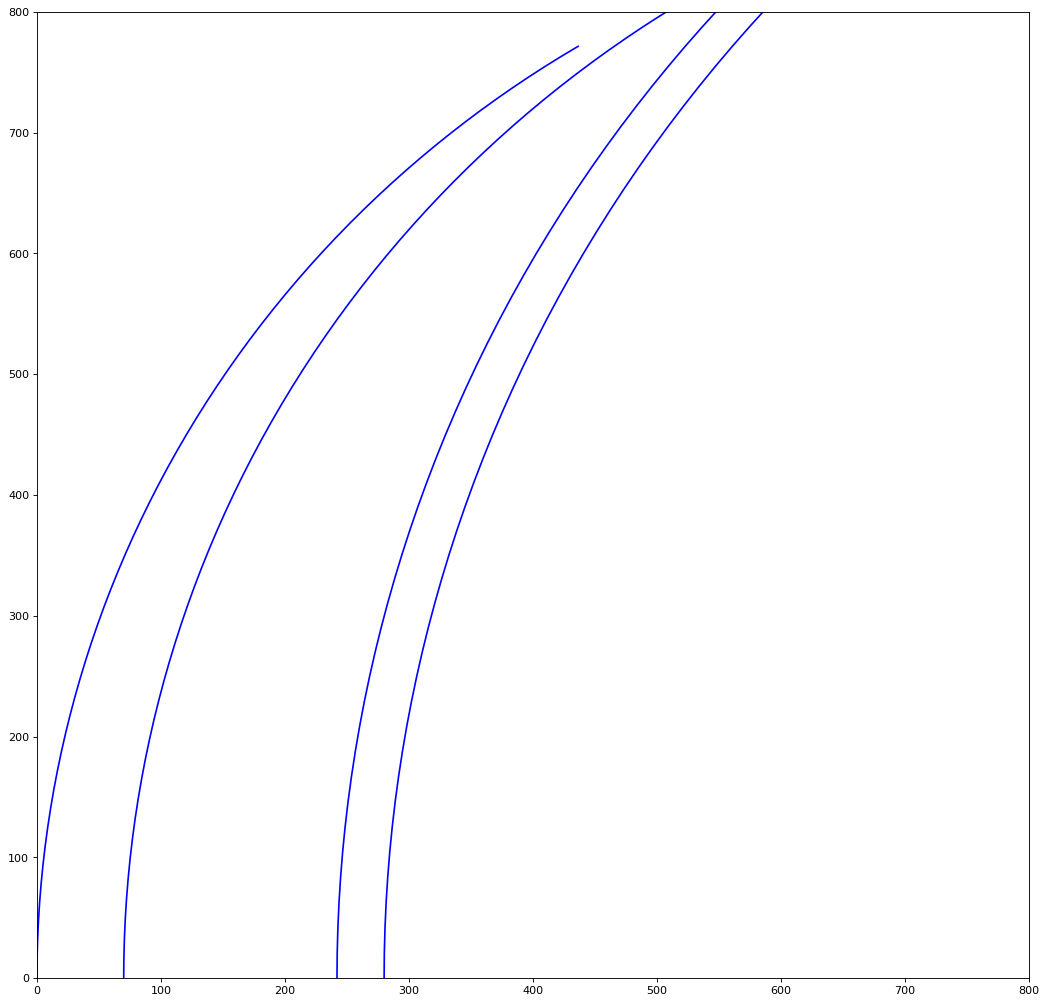

In [3]:
deg = np.arange(0,60,1)

x_nase = r_nase - r_nase*np.cos(np.radians(deg))
y_nase = r_nase*np.sin(np.radians(deg))

x_bepl = t_bepl_wurzel + r_bepl - r_bepl*np.cos(np.radians(deg))
y_bepl = r_bepl*np.sin(np.radians(deg))

x_max = t_wurzel + r_ende - r_ende*np.cos(np.radians(deg))
y_max = r_ende*np.sin(np.radians(deg));

x_endl = x_max - t_endl
y_endl = y_max

plt.figure(figsize=(16, 16), dpi=80)
plt.xlim([0,800])
plt.ylim([0,800])
plt.plot(x_nase, y_nase, color='blue')
plt.plot(x_bepl, y_bepl, color='blue')
plt.plot(x_max, y_max, color='blue')
plt.plot(x_endl, y_endl, color='blue')

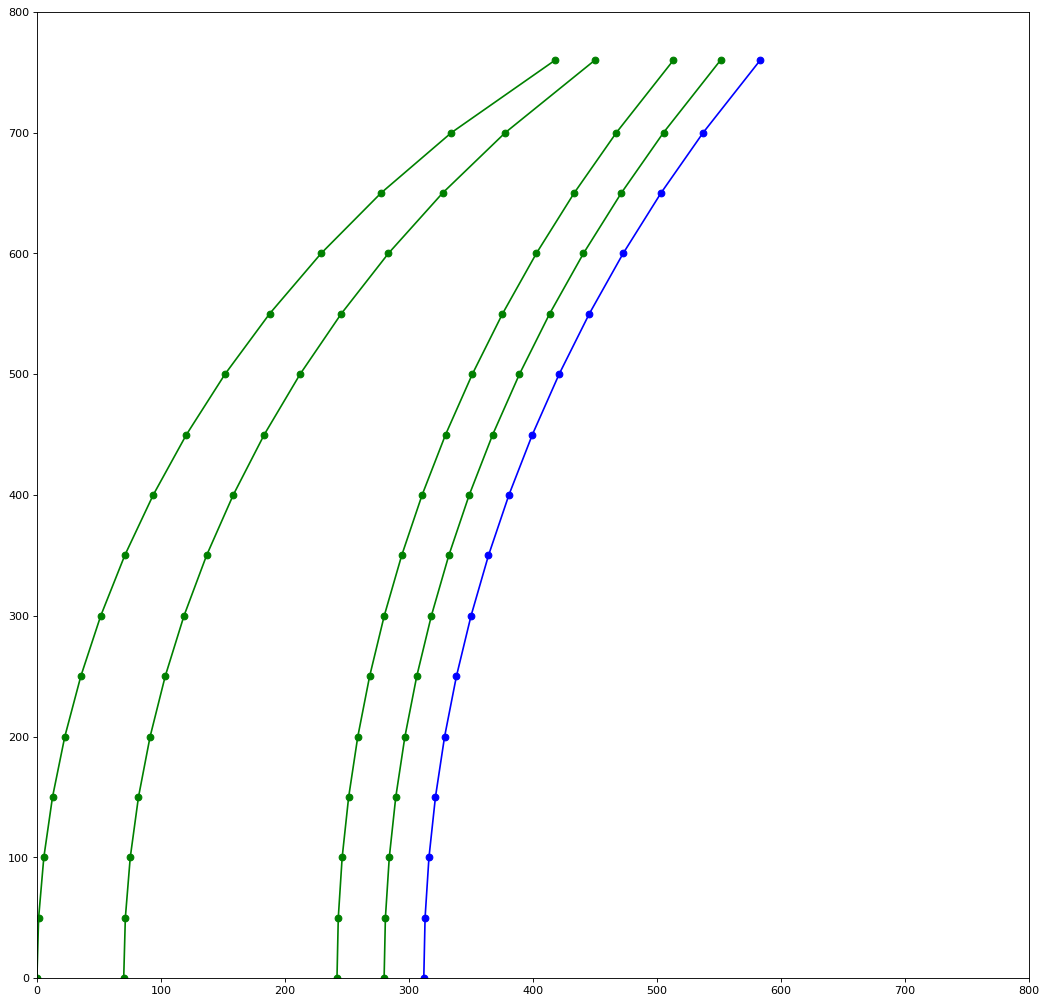

In [4]:
y_rippen = np.arange(0,750,50)
y_rippen = np.append(y_rippen,760)

rad_nase = np.arcsin(y_rippen/r_nase)
x_rippe_nase = r_nase - r_nase*np.cos(rad_nase)
y_rippe_nase = r_nase*np.sin(rad_nase)

rad_bepl = np.arcsin(y_rippen/r_bepl)
x_rippe_bepl = t_bepl_wurzel + r_bepl - r_bepl*np.cos(rad_bepl)
y_rippe_bepl = r_bepl*np.sin(rad_bepl)

breite = x_rippe_bepl - x_rippe_nase

rad_ende = np.arcsin(y_rippen/r_ende)
x_rippe_ende = t_wurzel + r_ende - r_ende*np.cos(rad_ende)
y_rippe_ende = r_ende*np.sin(rad_ende)

tiefe = x_rippe_ende - x_rippe_nase

x_QR = x_rippe_ende+32
y_QR = y_rippe_ende

tiefe_QR = x_QR - x_rippe_nase

plt.figure(figsize=(16, 16), dpi=80)
plt.xlim([0,800])
plt.ylim([0,800])
plt.plot(x_rippe_nase, y_rippe_nase, 'go-')
plt.plot(x_rippe_bepl, y_rippe_bepl, 'go-')
plt.plot(x_rippe_ende, y_rippe_ende, 'go-')
plt.plot(x_rippe_ende-t_endl, y_rippe_ende, 'go-')
plt.plot(x_QR, y_QR, 'bo-')


In [5]:
profil = [0]*16

for i in range(len(tiefe)):
        if (y_rippen[i]<550):
            tiefe_QR[i] = 0
            profil[i] = 'pw-res-main'
        else:
            tiefe[i]=0
            profil[i]='pw_res-tip'

data = [y_rippen, profil, x_rippe_nase, tiefe, tiefe_QR, breite]
a = np.array([data])

print(tabulate(a.transpose(),headers=['y','Profil','x-Versatz','Tiefe','Tiefe QR','Beplankungsbreite'],tablefmt='psql'))

+-----+-----------------+-------------+---------+------------+---------------------+
|   y | Profil          |   x-Versatz |   Tiefe |   Tiefe QR |   Beplankungsbreite |
|-----+-----------------+-------------+---------+------------+---------------------|
|   0 | ['pw-res-main'] |     0       | 280     |      0     |             70      |
|  50 | ['pw-res-main'] |     1.38996 | 279.652 |      0     |             69.9267 |
| 100 | ['pw-res-main'] |     5.57281 | 278.601 |      0     |             69.705  |
| 150 | ['pw-res-main'] |    12.588   | 276.824 |      0     |             69.3288 |
| 200 | ['pw-res-main'] |    22.5036  | 274.28  |      0     |             68.7877 |
| 250 | ['pw-res-main'] |    35.4192  | 270.911 |      0     |             68.0657 |
| 300 | ['pw-res-main'] |    51.4719  | 266.633 |      0     |             67.1403 |
| 350 | ['pw-res-main'] |    70.8438  | 261.332 |      0     |             65.9801 |
| 400 | ['pw-res-main'] |    93.7742  | 254.855 |      0     |   

In [6]:
max = len(tiefe)
for i in range(max-1,0,-1):
    print(data[0][i]/-1000, ',', data[2][i]/1000,',',0,',',data[3][i]/1000+data[4][i]/1000,',',0,',',75,',',data[1][i])
for i in range(max):
    print(data[0][i]/1000, ',', data[2][i]/1000,',',0,',',data[3][i]/1000+data[4][i]/1000,',',0,',',75,',',data[1][i])

-0.76 , 0.4179211682722421 , 0 , 0.16542389042824568 , 0 , 75 , pw_res-tip
-0.7 , 0.33431457505076206 , 0 , 0.20300599046834134 , 0 , 75 , pw_res-tip
-0.65 , 0.2775050201005632 , 0 , 0.2257829298078359 , 0 , 75 , pw_res-tip
-0.6 , 0.22917960675006305 , 0 , 0.24358990870861078 , 0 , 75 , pw_res-tip
-0.55 , 0.18760965756124962 , 0 , 0.2578538920536735 , 0 , 75 , pw_res-tip
-0.5 , 0.15166852264521163 , 0 , 0.23746026589121697 , 0 , 75 , pw-res-main
-0.45 , 0.1205771365940053 , 0 , 0.24699309034164538 , 0 , 75 , pw-res-main
-0.4 , 0.0937742251701452 , 0 , 0.25485492493137873 , 0 , 75 , pw-res-main
-0.35 , 0.07084380241115014 , 0 , 0.26133216926395014 , 0 , 75 , pw-res-main
-0.3 , 0.05147186257614283 , 0 , 0.266633133561632 , 0 , 75 , pw-res-main
-0.25 , 0.03541917671047076 , 0 , 0.270911363858979 , 0 , 75 , pw-res-main
-0.2 , 0.022503561260787706 , 0 , 0.2742804821192891 , 0 , 75 , pw-res-main
-0.15 , 0.012588032535057664 , 0 , 0.27682387748587667 , 0 , 75 , pw-res-main
-0.1 , 0.0055728090